In [1]:
# for data processing
import pandas as pd
import csv
import numpy as np
from sklearn.preprocessing import StandardScaler # standardize characteristic data
from sklearn.model_selection import train_test_split # split the data into training and testing 
from collections import Counter

# for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# training model
from sklearn.ensemble import RandomForestClassifier #random forest

# evaluating the model
from sklearn.metrics import confusion_matrix # confusion matrix
from sklearn.metrics import multilabel_confusion_matrix # multiclass confusion matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report # classification report

# initial setting 
pd.set_option('display.max_rows', 50)  
random_state = 42 # for reproducability
np.random.seed(random_state) # setting numpy random seed, as that is used for sklearn operation
import warnings 
warnings.filterwarnings("ignore") # ignore the warning message

## Data Preparation

In [2]:
variables = pd.read_csv('variables.csv')

In [3]:
voteforleave=variables['voteresult']
leaverate=variables['leave rate']
SCI=variables['SCIij']
GDHI_perhead=variables['GDHIperhead_pounds_2016']
morethan60_rate=variables['rate_60']
noqualifications_rate=variables['No Qualifications']
otherqualifications_rate=variables['Other Qualifications']
belowNQF2_rate=variables['Below NQF Level 2']
NQF2_rate=variables['NQF Level 2']
tradeapprenticeships=variables['Trade Apprenticeships']
NQF3_rate=variables['NQF Level 3'] 
aboveNQF4_rate=variables['NQF Level 4 and above']
unemployment_rate=variables['(16-64)unemployment rate'] 
economicinactivity_rate= variables['(16-64)Economic inactivity rate']
claimant_rate=variables['Claimant Count rate']
jobdensity=variables['job density(16-62) ratio']

In [4]:
dependent= pd.DataFrame()
dict1={'voteforleave':voteforleave}
dependent= pd.DataFrame(dict1)

In [5]:
#independent variable without SCI
independent_withoutsci = pd.DataFrame()
dict2 = {'GDHI_perhead': GDHI_perhead,
         'morethan60_rate': morethan60_rate, 'noqualifications_rate': noqualifications_rate,
        'otherqualifications_rate':otherqualifications_rate , 
         'belowNQF2_rate': belowNQF2_rate,
        'NQF2_rate': NQF2_rate, 'tradeapprenticeships': tradeapprenticeships,
        'NQF3_rate': NQF3_rate, 'aboveNQF4_rate': aboveNQF4_rate,
        'unemployment_rate': unemployment_rate, 'economicinactivity_rate':economicinactivity_rate,
        'claimant_rate': claimant_rate, 'jobdensity': jobdensity} 
independent_withoutsci = pd.DataFrame(dict2)

In [6]:
#independent variable with SCI
independent_withsci = pd.DataFrame()
dict3 = {'GDHI_perhead': GDHI_perhead,
         'morethan60_rate': morethan60_rate, 'noqualifications_rate': noqualifications_rate,
        'otherqualifications_rate':otherqualifications_rate , 
         'belowNQF2_rate': belowNQF2_rate,
        'NQF2_rate': NQF2_rate, 'tradeapprenticeships': tradeapprenticeships,
        'NQF3_rate': NQF3_rate, 'aboveNQF4_rate': aboveNQF4_rate,
        'unemployment_rate': unemployment_rate, 'economicinactivity_rate':economicinactivity_rate,
        'claimant_rate': claimant_rate, 'jobdensity': jobdensity,'SCI':SCI}
independent_withsci = pd.DataFrame(dict3)

In [7]:
labels = variables.iloc[:,0].values  #label
features1= independent_withoutsci.values   #feature without SCI
features2= independent_withsci.values      #feature with SCI

In [8]:
Y = labels
X1 = features1
X2 = features2
print(X1.shape,X2.shape,Y.shape)

(168, 13) (168, 14) (168,)


## Visulisation

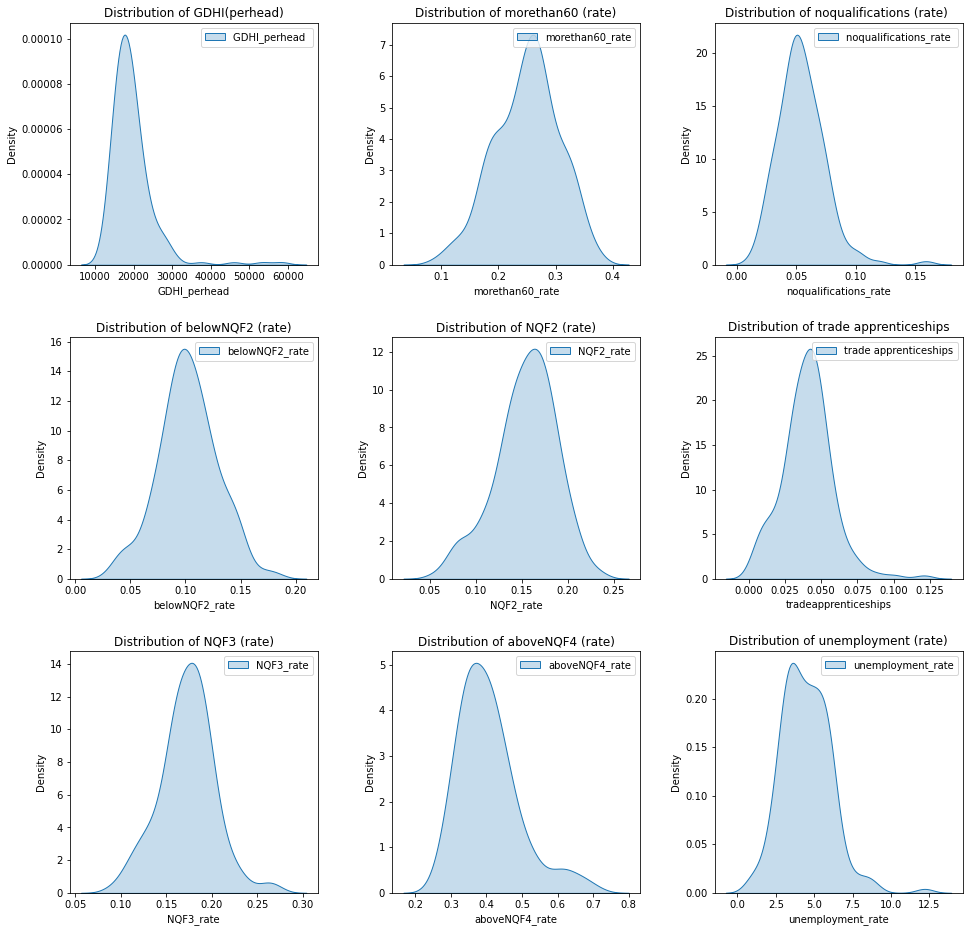

In [9]:
# Applying the density plots to all continuous variables
fig=plt.figure(figsize=(16, 16))
plt.subplots_adjust(wspace =0.3, hspace =0.3)
fig = plt.subplot(331)
sns.kdeplot(independent_withoutsci['GDHI_perhead'],shade=True,label='GDHI_perhead ')
plt.title ('Distribution of GDHI(perhead)')
plt.legend()

fig = plt.subplot(332)
sns.kdeplot(independent_withoutsci['morethan60_rate'],shade=True,label='morethan60_rate')
plt.title ('Distribution of morethan60 (rate)')
plt.legend()

fig = plt.subplot(333)
sns.kdeplot(independent_withoutsci['noqualifications_rate'],shade=True,label='noqualifications_rate ')
plt.title ('Distribution of noqualifications (rate) ')
plt.legend()

fig = plt.subplot(334)
sns.kdeplot(independent_withoutsci['belowNQF2_rate'],shade=True,label='belowNQF2_rate')
plt.title ('Distribution of belowNQF2 (rate)')
plt.legend()

fig = plt.subplot(335)
sns.kdeplot(independent_withoutsci['NQF2_rate'],shade=True,label='NQF2_rate')
plt.title ('Distribution of NQF2 (rate)')
plt.legend()

fig = plt.subplot(336)
sns.kdeplot(independent_withoutsci['tradeapprenticeships'],shade=True,label='trade apprenticeships')
plt.title ('Distribution of trade apprenticeships')
plt.legend()

fig = plt.subplot(337)
sns.kdeplot(independent_withoutsci['NQF3_rate'],shade=True,label='NQF3_rate')
plt.title ('Distribution of NQF3 (rate)')
plt.legend()

fig = plt.subplot(338)
sns.kdeplot(independent_withoutsci['aboveNQF4_rate'],shade=True,label='aboveNQF4_rate')
plt.title ('Distribution of aboveNQF4 (rate)')
plt.legend()

fig = plt.subplot(339)
sns.kdeplot(independent_withoutsci['unemployment_rate'],shade=True,label='unemployment_rate')
plt.title ('Distribution of unemployment (rate)')
plt.legend()

plt.show()

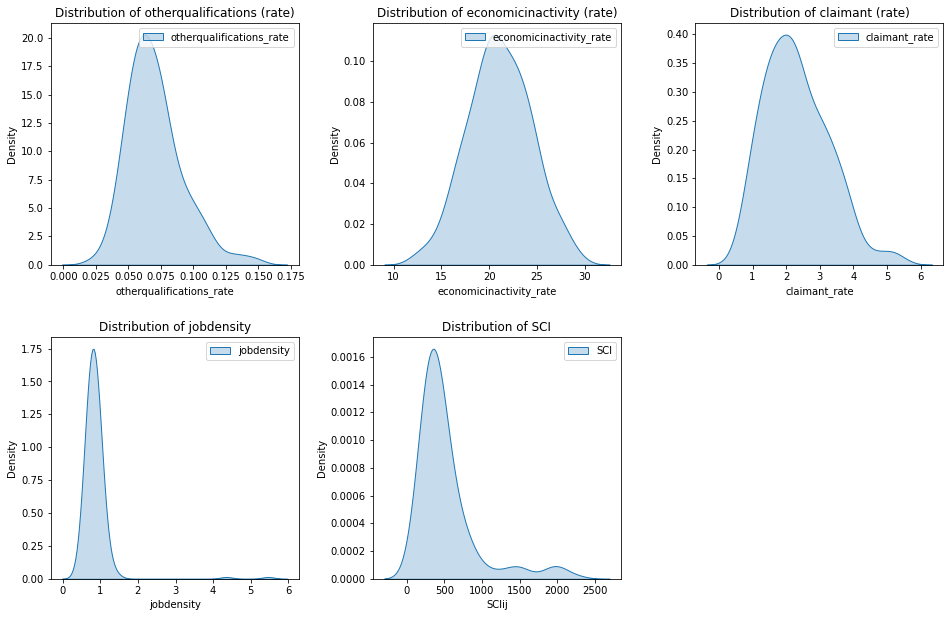

In [10]:
fig=plt.figure(figsize=(16, 16))
plt.subplots_adjust(wspace =0.3, hspace =0.3)
fig = plt.subplot(331)
sns.kdeplot(independent_withoutsci['otherqualifications_rate'],shade=True,label='otherqualifications_rate')
plt.title ('Distribution of otherqualifications (rate)')
plt.legend()

fig = plt.subplot(332)
sns.kdeplot(independent_withoutsci['economicinactivity_rate'],shade=True,label='economicinactivity_rate')
plt.title ('Distribution of economicinactivity (rate)')
plt.legend()

fig = plt.subplot(333)
sns.kdeplot(independent_withoutsci['claimant_rate'],shade=True,label='claimant_rate')
plt.title ('Distribution of claimant (rate)')
plt.legend()

fig = plt.subplot(334)
sns.kdeplot(independent_withoutsci['jobdensity'],shade=True,label='jobdensity')
plt.title ('Distribution of jobdensity')
plt.legend()

fig = plt.subplot(335)
sns.kdeplot(variables['SCIij'],shade=True,label='SCI')
plt.title ('Distribution of SCI')
plt.legend()

plt.show()

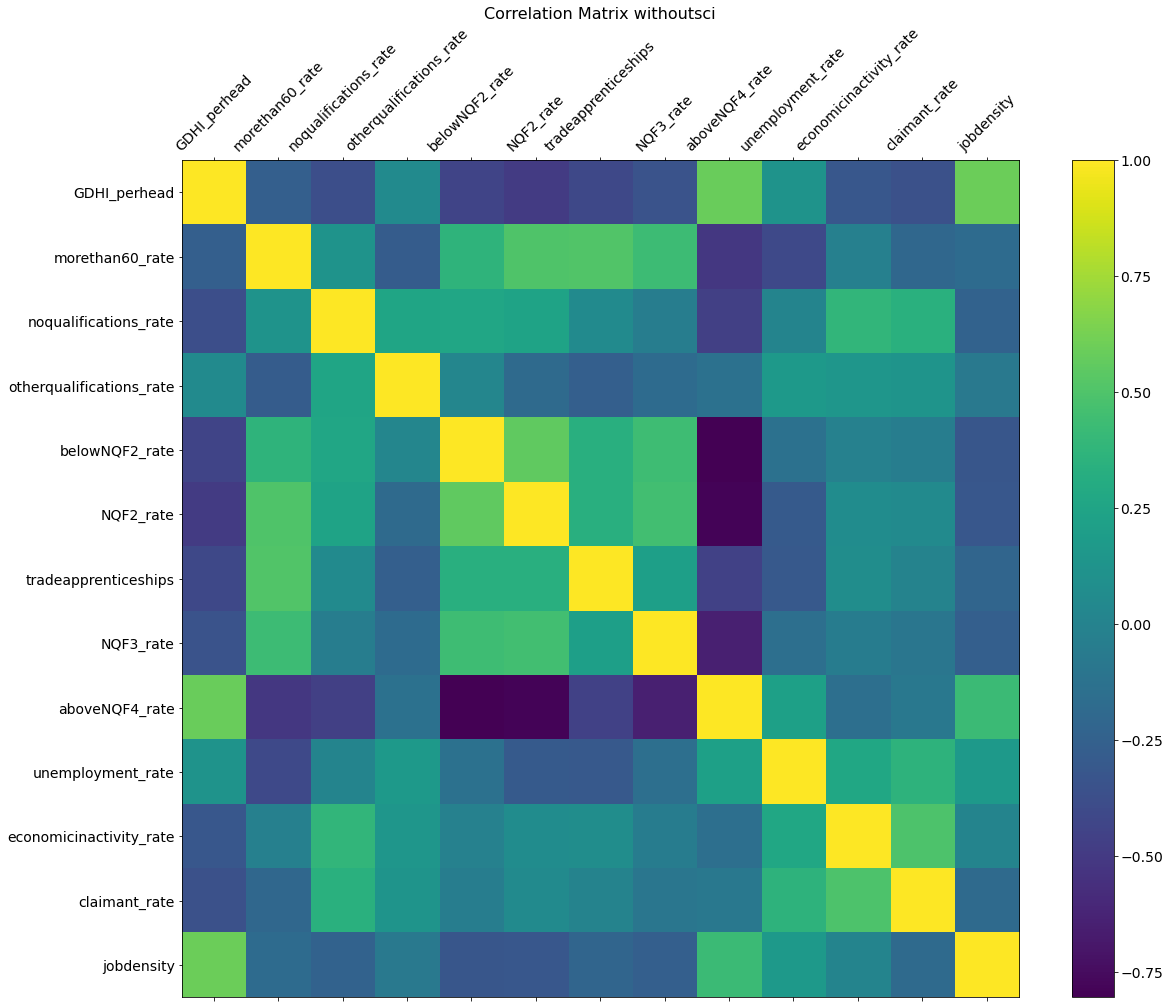

In [11]:
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(independent_withoutsci.corr(), fignum=f.number)
plt.xticks(range(independent_withoutsci.shape[1]), independent_withoutsci.columns, fontsize=14, rotation=45)
plt.yticks(range(independent_withoutsci.shape[1]), independent_withoutsci.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix withoutsci', fontsize=16)
plt.savefig('correlation Matrix without sci')

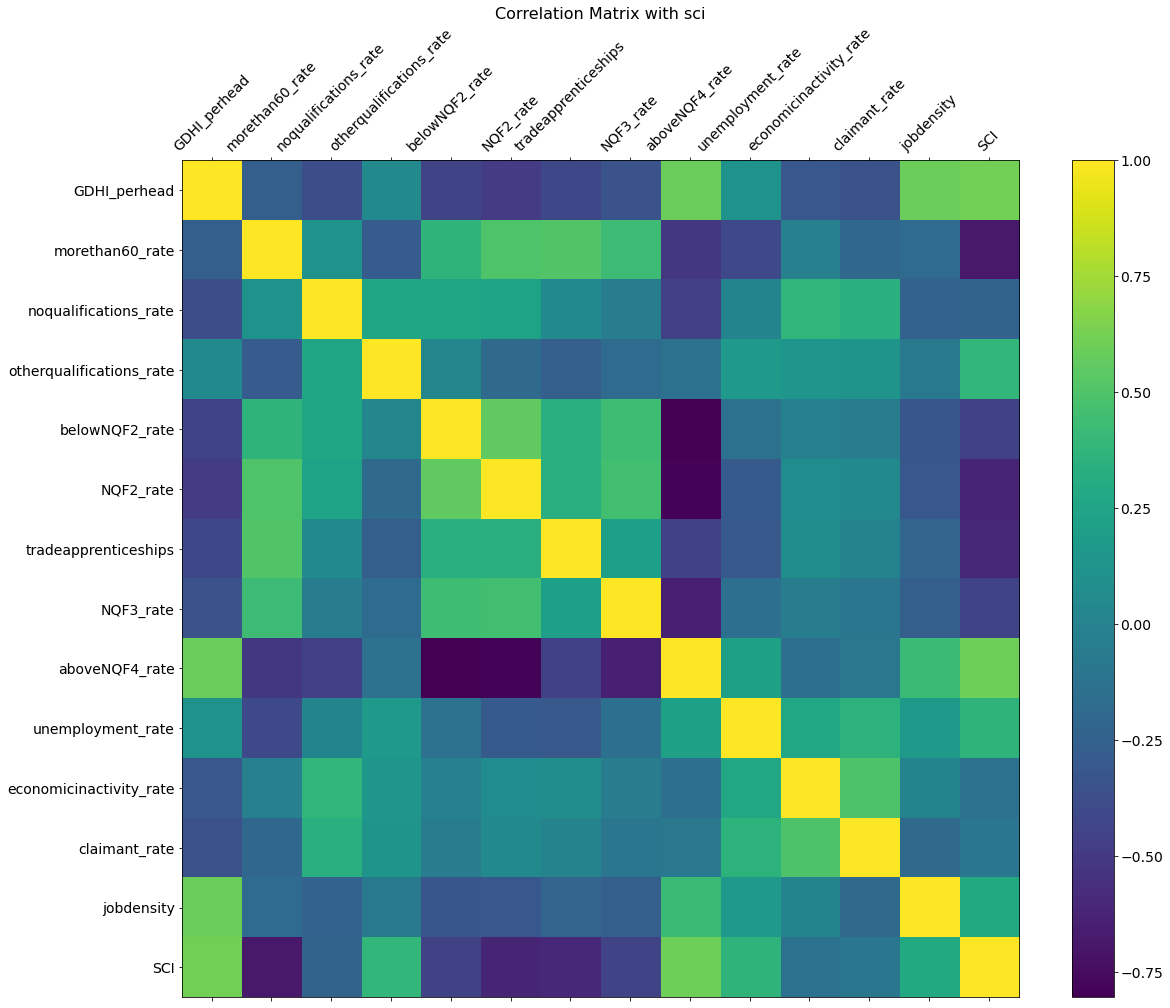

In [12]:
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(independent_withsci.corr(), fignum=f.number)
plt.xticks(range(independent_withsci.shape[1]), independent_withsci.columns, fontsize=14, rotation=45)
plt.yticks(range(independent_withsci.shape[1]), independent_withsci.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix with sci', fontsize=16)
plt.savefig('correlation Matrix with sci')

# classification

In [14]:
RF= RandomForestClassifier(n_estimators=125, criterion='entropy')

In [16]:
x1_train,x1_test, y_train,y_test = train_test_split(X1, Y, test_size=0.2, random_state=6)
print(x1_train.shape,x1_test.shape, y_train.shape,y_test.shape)

(134, 13) (34, 13) (134,) (34,)


In [18]:
# choose estimators and criterion
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


tuned_parameter = [{'n_estimators':[25,50,75,100,125,150,175,200],'criterion':['entropy','gini']}]
clf = GridSearchCV(estimator=RF,param_grid=tuned_parameter, cv=10)

clf.fit(x1_train, y_train)
print('Best parameters:')
print(clf.best_params_)

Best parameters:
{'criterion': 'gini', 'n_estimators': 125}


In [54]:
RF= RandomForestClassifier(n_estimators=125, criterion='entropy')

### model1: without SCI

In [39]:
x1_train,x1_test, y_train,y_test = train_test_split(X1, Y, test_size=0.2, random_state=6)
print(x1_train.shape,x1_test.shape, y_train.shape,y_test.shape)

(134, 13) (34, 13) (134,) (34,)


In [56]:
RF.fit(x1_train,y_train)
score_tree1 = RF.score(x1_test, y_test)
print(score_tree1)

0.9117647058823529


In [41]:
importances = RF.feature_importances_
print(importances)

[0.06302187 0.03568727 0.07220809 0.03316833 0.12601104 0.11647239
 0.06100036 0.11820207 0.18043517 0.04736433 0.06430673 0.04109273
 0.04102963]


Text(0.5, 1.0, 'Confusion Matrix of Model without SCI')

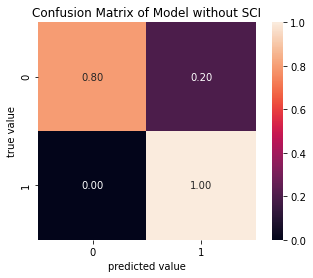

In [16]:
y_pred = RF.predict(x1_test)

#importing confusion matrix

conf= confusion_matrix(y_test, y_pred)
rows=conf.sum(axis=1, keepdims=True)
norm_conf = conf/ rows

sns.heatmap(norm_conf,square=True, annot=True, fmt='.2f')
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.title('Confusion Matrix of Model without SCI')

### with SCI

In [17]:
x2_train,x2_test, y_train,y_test = train_test_split(X2, Y, test_size=0.2, random_state=6)
print(x2_train.shape,x2_test.shape, y_train.shape,y_test.shape)

(134, 14) (34, 14) (134,) (34,)


In [21]:
RF.fit(x2_train,y_train)
score_tree2 = RF.score(x2_test, y_test)
print(score_tree2)

0.9411764705882353


In [26]:
importances = RF.feature_importances_
print(importances)

[0.0584505  0.02884075 0.07670845 0.03257817 0.11973372 0.11424099
 0.03424783 0.10936641 0.18099906 0.04694328 0.06391269 0.03938665
 0.04458315 0.05000836]


Text(0.5, 1.0, 'Confusion Matrix of Model with SCI')

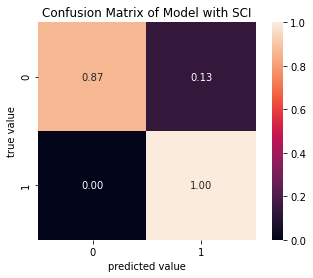

In [22]:
y_pred2 = RF.predict(x2_test)

#importing confusion matrix

conf2= confusion_matrix(y_test, y_pred2)
rows=conf2.sum(axis=1, keepdims=True)
norm_conf2 = conf2/ rows

sns.heatmap(norm_conf2,square=True, annot=True, fmt='.2f')
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.title('Confusion Matrix of Model with SCI')

### comparison

In [23]:
print('\n Random Forest Classification Report without SCI\n')
print(classification_report(y_test, y_pred, target_names=['remain', 'leave']))

print('\n Random Forest Classification Report with SCI\n')
print(classification_report(y_test, y_pred2, target_names=['fatal', 'serious']))


 Random Forest Classification Report without SCI

              precision    recall  f1-score   support

      remain       1.00      0.80      0.89        15
       leave       0.86      1.00      0.93        19

    accuracy                           0.91        34
   macro avg       0.93      0.90      0.91        34
weighted avg       0.92      0.91      0.91        34


 Random Forest Classification Report with SCI

              precision    recall  f1-score   support

       fatal       1.00      0.87      0.93        15
     serious       0.90      1.00      0.95        19

    accuracy                           0.94        34
   macro avg       0.95      0.93      0.94        34
weighted avg       0.95      0.94      0.94        34



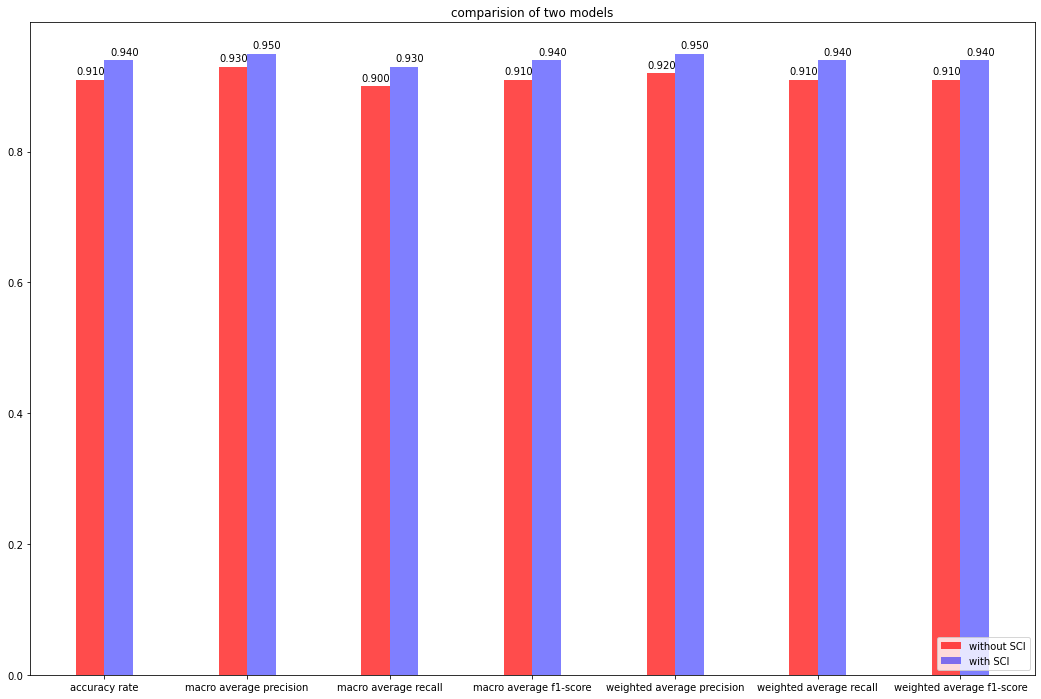

In [99]:
# visualisation of the classification report

plt.figure(figsize=(18,12))
Y1 = [0.91,0.93,0.90,0.91,0.92,0.91,0.91]
Y2 = [0.94,0.95,0.93,0.94,0.95,0.94,0.94]
X = np.arange(len(Y1))

bar_width = 0.2
tick_label = ['accuracy rate','macro average precision','macro average recall','macro average f1-score',
              'weighted average precision','weighted average recall','weighted average f1-score']

for x,y1 in zip(X,Y1):
    plt.text(x+0.005,y1+0.005,'%.3f' %y1, ha='center',va='bottom')

for x,y2 in zip(X,Y2):
    plt.text(x+0.24,y2+0.005,'%.3f' %y2, ha='center',va='bottom')
 
plt.bar(X, Y1, bar_width, align="center", color="red", label="without SCI", alpha=0.7)
plt.bar(X+bar_width, Y2, bar_width, color="blue", align="center", \
        label="with SCI", alpha=0.5)

plt.title('comparision of two models')
plt.xticks(X+bar_width/2, tick_label)
plt.legend(loc='lower right')
#plt.show()

In [24]:
importances = RF.feature_importances_

In [25]:
print(importances)

[0.0584505  0.02884075 0.07670845 0.03257817 0.11973372 0.11424099
 0.03424783 0.10936641 0.18099906 0.04694328 0.06391269 0.03938665
 0.04458315 0.05000836]
